In [2]:
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
 
 
# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
 
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
 
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [4]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)


Fitting the classifier to the training set
Iteration 1, loss = 1.50567064
Validation score: 0.575000
Iteration 2, loss = 1.10982485
Validation score: 0.612500
Iteration 3, loss = 0.87422228
Validation score: 0.662500
Iteration 4, loss = 0.67698755
Validation score: 0.737500
Iteration 5, loss = 0.52556501
Validation score: 0.850000
Iteration 6, loss = 0.41540302
Validation score: 0.875000
Iteration 7, loss = 0.33596826
Validation score: 0.862500
Iteration 8, loss = 0.27357143
Validation score: 0.862500
Iteration 9, loss = 0.22454596
Validation score: 0.862500
Iteration 10, loss = 0.18549094
Validation score: 0.850000
Iteration 11, loss = 0.15461461
Validation score: 0.850000
Iteration 12, loss = 0.13060359
Validation score: 0.862500
Iteration 13, loss = 0.11068634
Validation score: 0.862500
Iteration 14, loss = 0.09473860
Validation score: 0.875000
Iteration 15, loss = 0.08151239
Validation score: 0.862500
Iteration 16, loss = 0.07140650
Validation score: 0.850000
Iteration 17, loss = 0

In [5]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.86      0.84      0.85        64
  Donald Rumsfeld       0.85      0.70      0.77        40
    George W Bush       0.77      0.97      0.86       153
Gerhard Schroeder       0.88      0.44      0.59        34
       Tony Blair       0.87      0.65      0.74        51

         accuracy                           0.81       342
        macro avg       0.85      0.72      0.76       342
     weighted avg       0.82      0.81      0.80       342



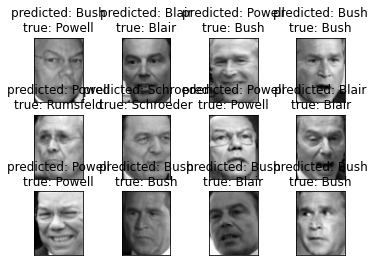

In [6]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
 
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
 
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)